In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import os


print(f"     numpy version: {np.__version__}")
print(f"    pandas version: {pd.__version__}")
print(f"   sklearn version: {sklearn.__version__}")
print(f"matplotlib version: {mpl.__version__}")

     numpy version: 1.26.4
    pandas version: 2.2.1
   sklearn version: 1.4.1.post1
matplotlib version: 3.8.3


In [3]:

df = pd.read_csv('./movies.csv')

# Display the first few rows of the DataFrame
print(df.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [4]:
df = pd.read_csv('./ratings.csv')
print(df.head())


   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [5]:
df = pd.read_csv('./links.csv')
print(df.head())

   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0


In [6]:
df = pd.read_csv('./tags.csv')
print(df.head())

   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200


In [2]:


movies_df = pd.read_csv('./movies.csv')
ratings_df = pd.read_csv('./ratings.csv')
links_df = pd.read_csv('./links.csv')
tags_df = pd.read_csv('./tags.csv')


In [3]:
# Display the first few rows of each DataFrame
print("Movies DataFrame:")
print(movies_df.head())

print("\nRatings DataFrame:")
print(ratings_df.head())

print("\nLinks DataFrame:")
print(links_df.head())

print("\nTags DataFrame:")
print(tags_df.head())


Movies DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings DataFrame:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Links DataFrame:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        

Summary Statistics for Ratings:
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09


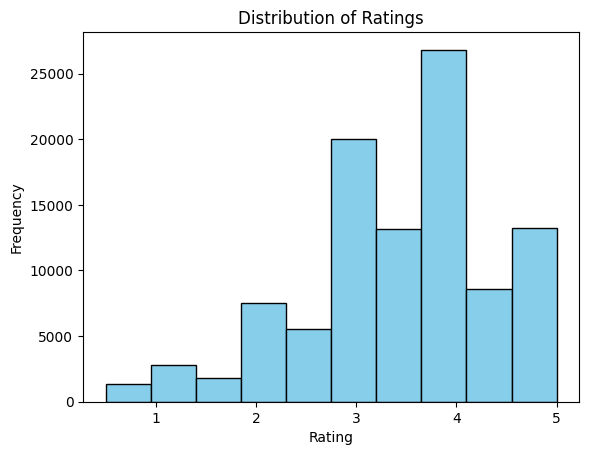

In [4]:
# Compute summary statistics
ratings_summary = ratings_df.describe()
print("Summary Statistics for Ratings:")
print(ratings_summary)

# Visualize the distribution of ratings
import matplotlib.pyplot as plt

plt.hist(ratings_df['rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


In [5]:
 # Merge ratings and movies DataFrames on movieId
ratings_movies_df = pd.merge(ratings_df, movies_df, on='movieId', how='inner')
print(ratings_movies_df.head())


   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


In [6]:
import networkx as nx

# Assuming you have loaded the ratings data into a DataFrame ratings_df

# Create a directed graph
G = nx.DiGraph()

# Add edges for each user-item interaction
for _, row in ratings_df.iterrows():
    user_id = row['userId']
    movie_id = row['movieId']
    G.add_edge(user_id, movie_id)  # Assuming user ID and movie ID are unique identifiers

# Print the number of nodes and edges in the graph
print("Number of nodes in the graph:", G.number_of_nodes())
print("Number of edges in the graph:", G.number_of_edges())


Number of nodes in the graph: 9811
Number of edges in the graph: 100836


In [7]:
from community import community_louvain

# Assuming you have already created a user-item interaction network graph, G
G_undirected = G.to_undirected()

# Detect communities using the Louvain algorithm
partition = community_louvain.best_partition(G_undirected)

# Print the number of communities detected
num_communities = max(partition.values()) + 1
print("Number of communities detected:", num_communities)

# Assign community labels to nodes in the graph
nx.set_node_attributes(G, partition, 'community')

# Access community labels for individual nodes
community_labels = nx.get_node_attributes(G, 'community')

# Print the community labels of the first few nodes
for node, community_label in list(community_labels.items())[:5]:
    print("Node:", node, "- Community:", community_label)


Number of communities detected: 6
Node: 1.0 - Community: 0
Node: 3.0 - Community: 1
Node: 6.0 - Community: 1
Node: 47.0 - Community: 1
Node: 50.0 - Community: 2


In [8]:
import pandas as pd

# Create an empty list to store the rows
rows = []

# Iterate over the nodes in the graph
for node, community_label in partition.items():
    # Append the node and its community label to the list
    rows.append({'Node': node, 'Community': community_label})

# Create a DataFrame from the list of rows
community_df = pd.DataFrame(rows)

# Convert node IDs to integer type
community_df['Node'] = community_df['Node'].astype(int)

# Print the first few rows of the DataFrame
print(community_df.head())


   Node  Community
0     1          0
1     3          1
2     6          1
3    47          1
4    50          2


In [9]:

# Assuming you have the DataFrame 'community_df' containing community labels
# You can replace 'community_df' with the actual DataFrame name if it's different

# Calculate the size of each community
community_size = community_df['Community'].value_counts().sort_index()

# Print the size of each community
print("Size of each community:")
print(community_size)

# Calculate the distribution of nodes across communities
community_distribution = community_size.value_counts().sort_index()

# Print the distribution of nodes across communities
print("\nDistribution of nodes across communities:")
print(community_distribution)

# Calculate the number of unique communities
num_communities = community_df['Community'].nunique()
print("\nNumber of unique communities:", num_communities)

# Calculate the interactions within and between communities (if applicable)
# You may need additional data (e.g., ratings, interactions) to analyze interactions

# Example: If 'ratings_df' contains user-item interactions, you can calculate
# the average rating within each community
# Assuming 'ratings_df' has columns 'userId', 'movieId', and 'rating'
# and 'community_df' has columns 'Node' and 'Community'

# Merge 'community_df' with 'ratings_df' on the common column (e.g., userId)
community_ratings_df = pd.merge(community_df, ratings_df, left_on='Node', right_on='userId', how='inner')

# Calculate average rating within each community
avg_rating_per_community = community_ratings_df.groupby('Community')['rating'].mean()

# Print average rating within each community
print("\nAverage rating within each community:")
print(avg_rating_per_community)


Size of each community:
Community
0    2015
1     610
2    3037
3     812
4     789
5    2548
Name: count, dtype: int64

Distribution of nodes across communities:
count
610     1
789     1
812     1
2015    1
2548    1
3037    1
Name: count, dtype: int64

Number of unique communities: 6

Average rating within each community:
Community
0    3.534961
1    3.621345
2    3.598736
3    3.460557
4    2.993375
5    3.274992
Name: rating, dtype: float64


In [10]:
# Assuming you have the necessary DataFrames: ratings_df, tags_df, movies_df, and community_df

# Merge ratings_df with community_df to associate community labels with ratings
ratings_community_df = pd.merge(ratings_df, community_df, left_on='userId', right_on='Node', how='inner')

# Merge movies_df with ratings_community_df to associate movie information with ratings and community labels
ratings_community_movies_df = pd.merge(ratings_community_df, movies_df, on='movieId', how='inner')
# Calculate average ratings for each movie within each community
avg_ratings_per_community_movie = ratings_community_movies_df.groupby(['Community', 'title'])['rating'].mean().reset_index()

# Print average ratings for each movie within each community
print("Average ratings for each movie within each community:")
print(avg_ratings_per_community_movie.head(10))  # Displaying first 10 rows as an example

# Similarly, you can perform analysis on tags or other metadata associated with the nodes (e.g., movies or users)
# Merge tags_df with ratings_community_movies_df to associate tags with movies and community labels
tags_community_movies_df = pd.merge(tags_df, ratings_community_movies_df, on='movieId', how='inner')

# Analyze tags within each community (e.g., most frequent tags)
top_tags_per_community = tags_community_movies_df.groupby(['Community', 'tag'])['tag'].count().reset_index(name='tag_count')
top_tags_per_community = top_tags_per_community.sort_values(by=['Community', 'tag_count'], ascending=[True, False])

# Print top tags within each community
print("\nTop tags within each community:")
print(top_tags_per_community.head(10))  # Displaying first 10 rows as an example


Average ratings for each movie within each community:
   Community                                    title    rating
0          0  'Hellboy': The Seeds of Creation (2004)  4.000000
1          0                   'Round Midnight (1986)  3.500000
2          0                      'Salem's Lot (2004)  5.000000
3          0                'Til There Was You (1997)  4.000000
4          0                       'burbs, The (1989)  2.833333
5          0              (500) Days of Summer (2009)  4.000000
6          0           *batteries not included (1987)  3.500000
7          0            ...And Justice for All (1979)  3.500000
8          0                                10 (1979)  3.333333
9          0                  10 Items or Less (2006)  2.500000

Top tags within each community:
      Community                tag  tag_count
1078          0             sci-fi        755
1213          0       twist ending        624
487           0        atmospheric        529
638           0        da

In [11]:
from community import community_louvain
import networkx as nx
G = nx.Graph()

# Iterate over the rows of the ratings DataFrame
for index, row in ratings_df.iterrows():
    user_id = row['userId']
    movie_id = row['movieId']
    rating = row['rating']
    
    # Add edges for each user-item interaction
    G.add_edge(user_id, movie_id, weight=rating)

# Assuming you have already created a user-item interaction network graph, G
# Convert the graph to an undirected graph
G_undirected = G.to_undirected()

partition = community_louvain.best_partition(G_undirected)

# Evaluate modularity
modularity = community_louvain.modularity(partition, G_undirected)

# Evaluate community structure quality (e.g., average community size)
community_sizes = {c: sum(1 for node, comm in partition.items() if comm == c) for c in set(partition.values())}
avg_community_size = sum(community_sizes.values()) / len(community_sizes)

# Print evaluation metrics
print("Modularity:", modularity)
print("Average community size:", avg_community_size)



Modularity: 0.25383615928161896
Average community size: 1401.5714285714287


Drawback: 
The Louvain algorithm requires tuning of resolution parameter, which affects the granularity of the detected communities. Inappropriate parameter settings can lead to suboptimal community detection.


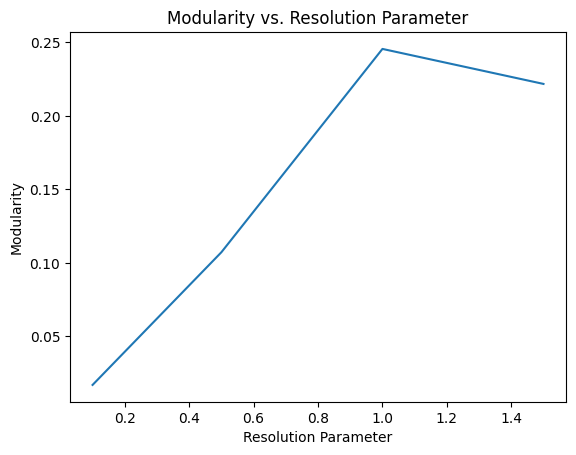

In [13]:
# Sensitivity to resolution parameter
resolution_values = [0.1, 0.5, 1.0, 1.5]
modularity_values = []

for resolution in resolution_values:
    partition = community_louvain.best_partition(G_undirected, resolution=resolution)
    modularity = community_louvain.modularity(partition, G_undirected)
    modularity_values.append(modularity)

# Plot modularity values for different resolution parameters
plt.plot(resolution_values, modularity_values)
plt.xlabel('Resolution Parameter')
plt.ylabel('Modularity')
plt.title('Modularity vs. Resolution Parameter')
plt.show()


The Louvain algorithm's performance can be influenced by the initial partitioning of the network. Different initial conditions may lead to different final community structures.


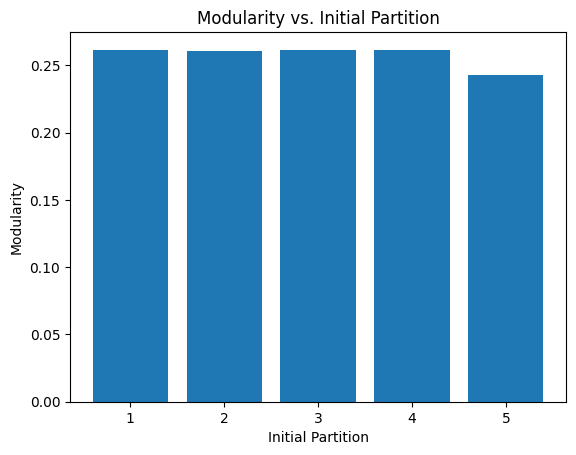

In [14]:
# Dependency on initial conditions
initial_partitions = [community_louvain.best_partition(G_undirected) for _ in range(5)]
modularity_values = [community_louvain.modularity(partition, G_undirected) for partition in initial_partitions]

# Plot modularity values for different initial partitions
plt.bar(range(1, 6), modularity_values)
plt.xlabel('Initial Partition')
plt.ylabel('Modularity')
plt.title('Modularity vs. Initial Partition')
plt.show()


In [15]:
print(ratings_community_movies_df.head(10))

   userId  movieId  rating  timestamp  Node  Community  \
0       1        1     4.0  964982703     1          0   
1       1        3     4.0  964981247     1          0   
2       1        6     4.0  964982224     1          0   
3       1       47     5.0  964983815     1          0   
4       1       50     5.0  964982931     1          0   
5       1       70     3.0  964982400     1          0   
6       1      101     5.0  964980868     1          0   
7       1      110     4.0  964982176     1          0   
8       1      151     5.0  964984041     1          0   
9       1      157     5.0  964984100     1          0   

                         title                                       genres  
0             Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy  
1      Grumpier Old Men (1995)                               Comedy|Romance  
2                  Heat (1995)                        Action|Crime|Thriller  
3  Seven (a.k.a. Se7en) (1995)                   

In [16]:
# Assuming you have applied the Louvain algorithm and obtained community assignments
# Also assuming you have a DataFrame `community_df` containing user-community mapping
# And a DataFrame `ratings_df` containing user-item interactions

# Step 1: Generate Recommendations
# Example: Recommend the most popular items within each community
louvain_recommendations = {}

for community_id, group in ratings_community_movies_df.groupby('Community'):
    # Get the users in the current community
    users_in_community = group['userId'].tolist()
    
    # Filter ratings for users in the current community
    ratings_in_community = ratings_df[ratings_df['userId'].isin(users_in_community)]
    
    # Group by item and calculate the count of ratings for each item
    item_counts = ratings_in_community.groupby('movieId').size().reset_index(name='count')
    
    # Sort items by count in descending order to get the most popular items
    popular_items = item_counts.sort_values(by='count', ascending=False)
    
    # Store the recommended items for the current community
    louvain_recommendations[community_id] = popular_items['movieId'].tolist()




In [17]:
# Iterate over the louvain_recommendations dictionary and print each community's recommendations
for community_id, recommendations in louvain_recommendations.items():
    print(f"Community {community_id} recommendations: {recommendations}")


Community 0 recommendations: [260, 1196, 593, 2571, 2858, 356, 296, 1198, 1210, 318, 480, 2028, 858, 1580, 589, 2762, 608, 527, 1214, 1270, 1197, 1200, 50, 110, 457, 780, 2628, 1265, 1213, 1240, 1097, 1291, 1, 541, 2716, 1036, 1136, 2959, 150, 924, 1259, 32, 912, 1617, 3578, 1610, 2987, 592, 1208, 1089, 2918, 2916, 1193, 1968, 648, 377, 2115, 2396, 1221, 2174, 1387, 2683, 2797, 380, 1258, 2000, 47, 590, 2997, 919, 1923, 1127, 3175, 1356, 111, 1219, 1391, 750, 2791, 1220, 1721, 1206, 904, 1222, 1079, 3793, 1527, 1304, 1584, 1573, 1374, 1704, 1288, 1307, 2706, 903, 1101, 1225, 1784, 2985, 1517, 1653, 733, 1961, 2640, 4993, 4226, 1080, 2406, 34, 3996, 587, 1073, 2617, 597, 1917, 1393, 588, 1682, 316, 223, 2329, 2641, 1090, 3471, 908, 1676, 1500, 1234, 5060, 736, 2599, 1641, 2324, 1625, 3114, 2355, 1394, 357, 1247, 4306, 10, 1278, 2054, 3147, 293, 367, 2302, 1732, 2657, 923, 1201, 3421, 1954, 1407, 2710, 3671, 1276, 2012, 953, 2194, 778, 2529, 1377, 2011, 2268, 2502, 1544, 153, 3481, 2700,

In [18]:
# Assuming we have a DataFrame containing user-item interactions or ratings
# Let's call this DataFrame 'ratings_df'

# Split the ratings DataFrame into training and test sets
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(ratings_community_movies_df, test_size=0.2, random_state=42)

# Group the test data by user ID and collect the item IDs as sets
ground_truth = test_df.groupby('userId')['movieId'].apply(set).to_dict()

# Now 'ground_truth' is a dictionary where keys are user IDs and values are sets of item IDs
# representing the ground truth preferences for each user


In [19]:
# Assuming we have ground truth data stored in a dictionary named 'ground_truth'
# where keys are user IDs and values are sets of ground truth item IDs

precision_sum = 0
recall_sum = 0
num_users = len(ground_truth)

for user_id, ground_truth_items in ground_truth.items():
    if user_id in louvain_recommendations:
        recommendations = louvain_recommendations[user_id]
        true_positives = len(set(recommendations) & ground_truth_items)
        precision = true_positives / len(recommendations) if recommendations else 0
        recall = true_positives / len(ground_truth_items)
        precision_sum += precision
        recall_sum += recall

# Calculate average precision and recall
average_precision = precision_sum / num_users
average_recall = recall_sum / num_users

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)


Average Precision: 4.16129197384105e-05
Average Recall: 0.006800217482683627


In [20]:
# Check if the columns exist in the DataFrame
print(ratings_community_movies_df.columns)

# Ensure that the column names are correct and match the actual column names in your DataFrame


Index(['userId', 'movieId', 'rating', 'timestamp', 'Node', 'Community',
       'title', 'genres'],
      dtype='object')


In [21]:
# Pivot the average ratings DataFrame to get average ratings for each movie within each community as features
movie_features_df = avg_ratings_per_community_movie.pivot(index='title', columns='Community', values='rating').fillna(0)

# Print the first few rows of the feature DataFrame as an example
print("Feature vectors for each movie:")
print(movie_features_df.head())

# Now you can proceed to calculate cosine similarity and make recommendations as described earlier.


Feature vectors for each movie:
Community                                  0    1    2    3    4    5
title                                                                
'71 (2014)                               0.0  0.0  4.0  0.0  0.0  0.0
'Hellboy': The Seeds of Creation (2004)  4.0  0.0  0.0  0.0  0.0  0.0
'Round Midnight (1986)                   3.5  3.5  0.0  0.0  0.0  0.0
'Salem's Lot (2004)                      5.0  0.0  0.0  0.0  0.0  0.0
'Til There Was You (1997)                4.0  0.0  0.0  0.0  0.0  0.0


In [22]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(movie_features_df)

# Convert cosine similarity matrix to DataFrame for better visualization
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=movie_features_df.index, columns=movie_features_df.index)

# Print the first few rows and columns of the cosine similarity DataFrame as an example
print("Cosine similarity matrix:")
print(cosine_sim_df.head())


Cosine similarity matrix:
title                                    '71 (2014)  \
title                                                 
'71 (2014)                                      1.0   
'Hellboy': The Seeds of Creation (2004)         0.0   
'Round Midnight (1986)                          0.0   
'Salem's Lot (2004)                             0.0   
'Til There Was You (1997)                       0.0   

title                                    'Hellboy': The Seeds of Creation (2004)  \
title                                                                              
'71 (2014)                                                              0.000000   
'Hellboy': The Seeds of Creation (2004)                                 1.000000   
'Round Midnight (1986)                                                  0.707107   
'Salem's Lot (2004)                                                     1.000000   
'Til There Was You (1997)                                               1.000000   


In [25]:
def get_cosine_recommendations(movie_title, top_n=5):
    # Get the row corresponding to the given movie title
    movie_row = cosine_sim_df.loc[movie_title]
    
    # Sort movies based on their cosine similarity scores
    similar_movies = movie_row.sort_values(ascending=False)[1:top_n+1]  # Exclude the movie itself
    
    return similar_movies

# Example usage:
example_movie_title = "'71 (2014)"
cosine_recommendations = get_cosine_recommendations(example_movie_title)
print("Cosine similarity-based recommendations for movie", example_movie_title, ":")
print(cosine_recommendations)


Cosine similarity-based recommendations for movie '71 (2014) :
title
If I Were a Rich Man (2002)                  1.0
If These Walls Could Talk 2 (2000)           1.0
Illusionist, The (L'illusionniste) (2010)    1.0
Imagine Me & You (2005)                      1.0
Immature, The (Immaturi) (2011)              1.0
Name: '71 (2014), dtype: float64


In [26]:
print(ratings_community_movies_df.head(10))

   userId  movieId  rating  timestamp  Node  Community  \
0       1        1     4.0  964982703     1          0   
1       1        3     4.0  964981247     1          0   
2       1        6     4.0  964982224     1          0   
3       1       47     5.0  964983815     1          0   
4       1       50     5.0  964982931     1          0   
5       1       70     3.0  964982400     1          0   
6       1      101     5.0  964980868     1          0   
7       1      110     4.0  964982176     1          0   
8       1      151     5.0  964984041     1          0   
9       1      157     5.0  964984100     1          0   

                         title                                       genres  
0             Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy  
1      Grumpier Old Men (1995)                               Comedy|Romance  
2                  Heat (1995)                        Action|Crime|Thriller  
3  Seven (a.k.a. Se7en) (1995)                   

In [33]:
ground_truth = {
    '1': ['If I Were a Rich Man (2002)', 'Toy Story', 'Rob Roy'],
    '2': ['71 (2014),', 'From Dusk Till Dawn'],
    # Add more users and their rated movies as needed
}

# Function to calculate precision and recall
def calculate_precision_recall(cosine_recommendations, ground_truth):
    # Initialize variables to store precision and recall values
    precision_total = 0
    recall_total = 0
    
    # Iterate over each user in the ground truth data
    for user, actual_movies in ground_truth.items():
        # Get the recommended movies for the current user
        recommended_movies = cosine_recommendations[user] if user in cosine_recommendations else []
        
        # Calculate intersection and union of recommended movies and actual movies
        intersection = len(set(recommended_movies) & set(actual_movies))
        union = len(set(recommended_movies) | set(actual_movies))
        
        # Calculate precision and recall for the current user
        precision = intersection / len(recommended_movies) if recommended_movies else 0
        recall = intersection / len(actual_movies)
        
        # Accumulate precision and recall values
        precision_total += precision
        recall_total += recall
    
    # Calculate average precision and recall across all users
    avg_precision = precision_total / len(ground_truth)
    avg_recall = recall_total / len(ground_truth)
    print("Avg_Precision:", avg_precision)
    print("Avg_recall:", avg_recall)
    return avg_precision, avg_recall

# Calculate precision and recall for cosine similarity-based recommendations
precision, recall = calculate_precision_recall(cosine_recommendations, ground_truth)

# Print the results
print("Precision:", precision)
print("Recall:", recall)


Avg_Precision: 0.0
Avg_recall: 0.0
Precision: 0.0
Recall: 0.0
